Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `SECTION` below:

In [ ]:
NAME = ""
ID = ""
SECTION = ""

---

## Importing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from numpy.polynomial import Polynomial

In [ ]:
P=Polynomial([1,2,3,4])

In [ ]:
print(P)

1.0 + 2.0·x + 3.0·x² + 4.0·x³


In [ ]:
print(P.deriv(1))

2.0 + 6.0·x + 12.0·x²


## Part 1: Polynomial Interpolation Using Newton's Divided Difference Form
---


### Newton's Divided Difference Form

Newton form of a $n$ degree polynomial:

$$p_n(x) = \sum_{k=0}^{n} a_kn_k(x),$$
where the basis is:
$$n_k(x) = \prod_{j=0}^{k-1}(x-x_j),$$
$$ n_0(x)=1,$$

and the coefficients are: $$a_k = f[x_0, x_1, ..., x_k],$$

where the notation $f[x_0, x_1,\dots,x_k]$ denotes the divided difference.

By expanding the Newton form, we get:

$$p(x) = f [x_0] + (x-x_0) f[x_0,x_1] + (x-x_0) (x-x_1) f[x_0,x_1,x_2] + \dots + (x-x_0) (x-x_1) \dots (x-x_{k-1}) f[x_0, x_1, \dots, x_k]$$

## Task 1 - 2+2 Marks
1. Complete the `calc_div_diff(x,y)` function which takes input `x` and `y`, and calculates all the divided differences. You may use the lambda function `difference()` inside the `calc_div_diff(x,y)` function to calculate the divided differences.

2. Complete the `__call__()` function which takes an input `x`, and calculates `y` using all the difference coefficients. `x` can be a single value or a numpy. In this case, it is a numpy array.

`res` variable must contain all results (corresponding y for x).

In [ ]:
# basic rule for calculating the difference, implanted in the lambda function.
# You may use it if you wish
difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)

def calc_div_diff(x,y):
    assert(len(x)==len(y))
    #write this function to calculate all the divided differences in the list 'b'
    n = len(x)
    b = np.zeros((n,n))  #initializing
    #----------------------------------------------
    # YOUR CODE HERE
    b[:,0]=y
    for i in range(1,n):
      for j in range(n-i):
        b[j][i]=difference(b[j+1][i-1],b[j][i-1],x[j+i],x[j])
    #raise NotImplementedError()

    #----------------------------------------------

    return b[0]

In [ ]:
data_x = [-3.,-2.,-1.,0.,1.,3.,4.]
data_y = [-60.,-80.,6.,1.,45.,30.,16.]

test = calc_div_diff(data_x, data_y)

np.testing.assert_array_equal([-60.0,-20.0,53.0,-32.833333333333336,14.041666666666668,-3.465277777777778,0.7232142857142857], test)


In [ ]:
class Newtons_Divided_Differences:

    def __init__(self, differences, data_x):
        self.differences = differences
        self.data_x = data_x

    def n(self, k, x):

        result = 1
        #----------------------------------------------
        # YOUR CODE HERE
        for i in range(k):
          result*=(x-self.data_x[i])
        #raise NotImplementedError()
        #----------------------------------------------

        return result

    def __call__(self, x):
        '''
        this function is for calculating y from given x using all the difference coefficients
        x can be a single value or a numpy
        the formula being used:
        f(x) = f [x0] + (x-x0) f[x0,x1] + (x-x0) (x-x1) f[x0,x1,x2] + . . . + (x-x0) (x-x1) . . . (x-xk-1) f[x0, x1, . . ., xk]

        work on this after implementing 'calc_div_diff'. Then you should have
        f[x0], f[x0,x1]. . . . . ., f[x0, x1, . . ., xk] stored in self.differences

        'res' variable must return all the results (corresponding y for x)
        '''

        res = np.zeros(len(x)) #Initialization to avoid runtime error. You can change this line if you wish

        #----------------------------------------------
        # YOUR CODE HERE
        for k in range(len(self.differences)):
          res+=self.differences[k]*self.n(k,x)
        #raise NotImplementedError()
        #----------------------------------------------

        return res


### Plotting the polynomial
* `data_x` and `data_y` are the coordinates of the given nodes.

* `differences` is a list which contains the divided differences as each of its elements: $f[x_0], f[x_0,x_1], f[x_0,x_1,x_2], \dots$

* `obj` is an object of type `Newtons_Divided_Differences`. Creating the object runs the constructor of the class where the `difference` are stored in `self.differences`.

* `X` contains $x_i$ values through which we want to plot our polynomial.

* Calling the object using `obj(X)` executes the `__call__()` function of the class, which returns a numpy array containing the corresponding $y_i$ values, and storing them in variable `F`.

* Using `plt.plot(X,F)`, we plot the $(x_i, y_i)$ pairs of the polynomial.

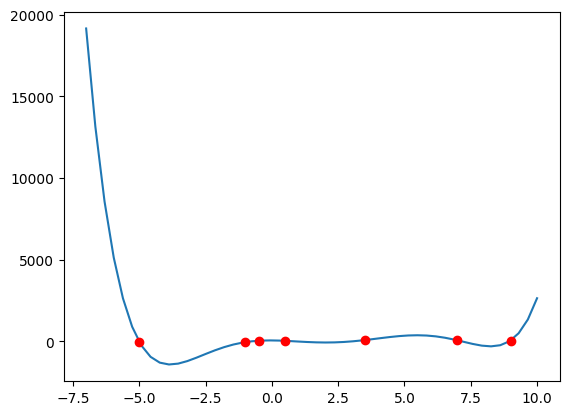

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([-5.,-1,-0.5,0.5,3.5,7.,9])
data_y = np.array([-30., -50., 36., 31., 75., 60., 46.])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)
test_x = np.linspace(-7, 10, 50, endpoint=True)
test_y = p(test_x)

#generating 50 points from -3 to 4 in order to create a smooth line
plt.plot(test_x, test_y)
plt.plot(data_x, data_y, 'ro')
plt.show()


# Daily Evaluation - 4 marks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([-1.5,0.5,1.67])
data_y = np.array([3.75,1.22,2.9])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)
x=np.array([0.25])
res=p(x)
print(res)




[1.16349207]
